In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

load_data = pd.read_csv("loan_data.csv")
load_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'loan_data.csv'

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix # para mostrar resultados
from mlxtend.plotting import plot_confusion_matrix # para graficar matriz de confusión
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separar características (X) y etiquetas (y)
X = load_data.drop("not.fully.paid", axis=1)  # reemplaza 'target' por el nombre de tu variable objetivo
y = load_data["not.fully.paid"]

# Identificar columnas categóricas
cat_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    cat_features=cat_features,
    verbose=100
)

# Entrenar el modelo
model.fit(X_train, y_train, cat_features=cat_features)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar
print("Accuracy:", accuracy_score(y_test, y_pred))

# Resultados
matriz_confusion = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=matriz_confusion)

plt.savefig('matriz_confusion.png')

print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt

# Obtener importancias
importances = model.get_feature_importance()
feature_names = X.columns

# Visualizar
plt.figure(figsize=(12, 8))
plt.barh(feature_names, importances)
plt.xlabel("Importancia")
plt.title("Importancia de las variables según CatBoost")
plt.show()

# Ordenar de mayor a menor
indices_ordenados = np.argsort(importances)[::-1]


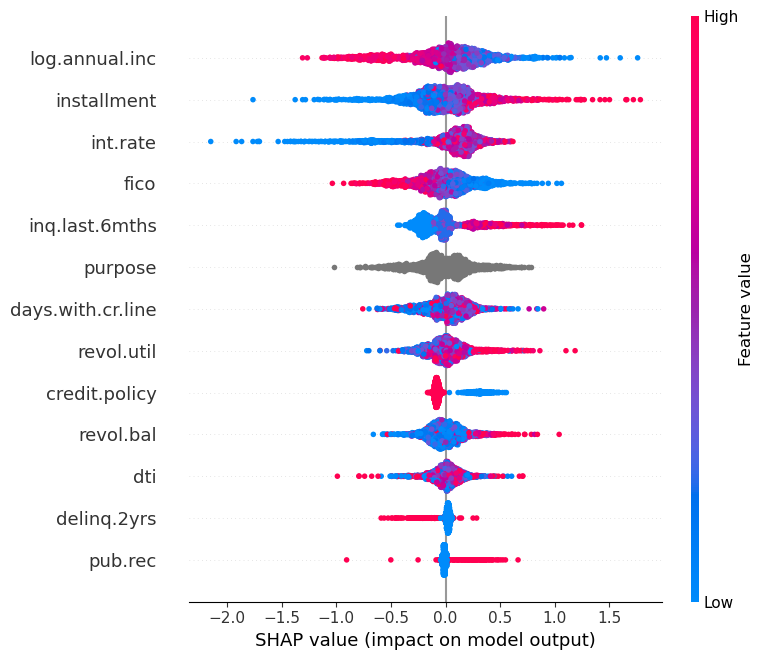

In [43]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)